In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.polynomial.polynomial import Polynomial

In [3]:
poly = Polynomial([1,0,0,0,0,1])

In [4]:
der = poly.deriv()
der

Polynomial([ 0.,  0.,  0.,  0.,  5.], [-1.,  1.], [-1.,  1.])

In [5]:
der(1)
x = np.array([1,2,3])
der(x)

array([   5.,   80.,  405.])

In [6]:
poly.roots()

array([-1.00000000+0.j        , -0.30901699-0.95105652j,
       -0.30901699+0.95105652j,  0.80901699-0.58778525j,
        0.80901699+0.58778525j])

In [7]:
def dist(roots,point):
    return np.abs(roots-point)

In [8]:
dists = dist(poly.roots(),x[:,np.newaxis])
np.min(dists, axis = 1)
np.argmin(dists, axis = 1 )

array([3, 3, 3], dtype=int64)

In [9]:
def get_delta(poly,deriv,point):
    return -poly(point)/deriv(point)

In [10]:
get_delta(poly,der,x)

array([-0.4       , -0.4125    , -0.60246914])

In [11]:
grid = np.array([[2.,3.,4.],[1.,-2.,3.]])
dists = grid[:,:,newaxis]
dists
dists = dists - poly.roots()
np.argmin(dists, axis = 2)

array([[4, 4, 4],
       [4, 4, 4]], dtype=int64)

Setup initial data

In [12]:
grid = np.array([[2.,3.,4.],[1.,-2.,3.]])
print "initial data"
print grid
done = np.ones_like(grid)
print "is done"
print done
count = np.zeros_like(grid)
print "amout of iterations"
print count
num = 0
print "roots"
print poly.roots()

initial data
[[ 2.  3.  4.]
 [ 1. -2.  3.]]
is done
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
amout of iterations
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
roots
[-1.00000000+0.j         -0.30901699-0.95105652j -0.30901699+0.95105652j
  0.80901699-0.58778525j  0.80901699+0.58778525j]


Run this cell X times to see how the loop works

In [13]:
dists = np.abs(grid[:,:,newaxis]-poly.roots())
print "distances from roots"
print dists
mins = np.min(dists,axis=2)< 1e-5
print "tolerance reached?"
print mins
done[mins] = 0
print "some are done?"
print done
grid[done == 1] += get_delta(poly,der,grid[done == 1])
print "grid updated"
print grid
count[~mins] = num
print "update count on not done"
print count[mins]
num+=1
print "which root is the closes to current solution?"
print np.argmin(dists,axis=2)

distances from roots
[[[ 3.          2.49721204  2.49721204  1.32813103  1.32813103]
  [ 4.          3.44297865  3.44297865  2.26845719  2.26845719]
  [ 5.          4.41272432  4.41272432  3.24466702  3.24466702]]

 [[ 2.          1.61803399  1.61803399  0.61803399  0.61803399]
  [ 1.          1.94008557  1.94008557  2.86985504  2.86985504]
  [ 4.          3.44297865  3.44297865  2.26845719  2.26845719]]]
tolerance reached?
[[False False False]
 [False False False]]
some are done?
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
grid updated
[[ 1.5875      2.39753086  3.19921875]
 [ 0.6        -1.6125      2.39753086]]
update count on not done
[]
which root is the closes to current solution?
[[3 3 3]
 [3 0 3]]


In [14]:
def newton_matrix(poly,deriv,roots,grid,max_num=20,tolerance=1e-5):
    done = np.ones_like(grid)
    count = np.zeros_like(grid, dtype = float32)
    num = 0
    while np.sum(done) != 0 and num < max_num:
        dists = np.abs(grid[:,:,newaxis]-roots)
        mins = np.min(dists,axis=2)<tolerance
        done[mins] = 0
        grid[done == 1] += get_delta(poly,der,grid[done == 1])
        count[~mins] = num
        num+=1
    dists = np.abs(grid[:,:,newaxis]-roots)
    root = np.argmin(dists,axis=2)
    return count, root

In [15]:
count, root  = newton_matrix(poly,der,poly.roots(),np.array([[1.,2.+2j,3.],[-3.+1j,1.-3j,2.]]),max_num=20,tolerance=1e-3)

colors = np.array(
            [[200.,0.,100.],
             [100.,200.,0.],
             [100.,0.,200.],
             [200.,100.,0.],
             [0.,200.,100.]])
colors[root]

array([[[ 200.,    0.,  100.],
        [   0.,  200.,  100.],
        [ 200.,    0.,  100.]],

       [[ 200.,    0.,  100.],
        [ 100.,    0.,  200.],
        [ 200.,    0.,  100.]]])

In [16]:
def get_image(poly,deriv=None,roots=None,size = 200,rang = 2., colors = None, center = (0.,0.), rotation = 0.0, printing = False):

    if colors is None:
        colors = np.array(
            [[200.,0.,100.],
             [100.,200.,0.],
             [100.,0.,200.],
             [200.,100.,0.],
             [0.,200.,100.]])
    
    if deriv is None:
        deriv = poly.deriv()
    
    
    if roots is None:
        roots = poly.roots()

    grid = np.mgrid[0:size,0:size]/float(size)*rang - rang/2
    grid[0] += center[1]
    grid[1] += center[0]
    
    grid = grid[0] + 1j * grid[1]
    grid *= (sin(rotation) + 1j * cos(rotation))
    
    darken, color = newton_matrix(poly,deriv,roots,grid)
             
    img = colors[color] - darken[:,:,newaxis]*5.
    return img

d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\numpy\polynomial\_polybase.py:292: RuntimeWarning: invalid value encountered in multiply
  arg = off + scl*arg
d:\anac\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning: invalid value encountered in less


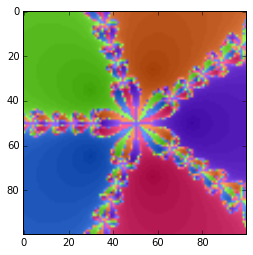

In [17]:
size = 100
img = get_image(poly, size = size, rang=4., center = (0,0), rotation= 0, printing = True)
imshow(img)
name = "obrazek {0:d}"
imsave(name.format(size),img)

In [18]:
def save_animation(poly,size,move_x,move_y,zoom,rotation,steps,stepsize):
    deriv = poly.deriv()
    roots = poly.roots()
    t = 0.0
    plt.ion()
    for i in range(steps):
        z = zoom(t)
        x = move_x(t)
        y = move_y(t)
        r = rotation(t)
        print ".",
        img = get_image(poly,deriv = deriv, roots = roots, size = size, rang = z, center = (x,y), rotation = r, printing = True)
        imsave('anim_{0:03d}'.format(i),img)
        t += stepsize
    plt.show()

In [19]:
save_animation(poly,
               256,
               lambda x: 0.01,
               lambda x: -1,
               lambda x: sin(x+3.14)+1.01,
               lambda x: x,
               steps = 100, stepsize = 2*3.14/100)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [20]:
def save_animation_poly_change(poly_fun,size,move_x,move_y,zoom,rotation,steps,stepsize):
    t = 0.0
    plt.ion()
    for i in range(steps):
        poly = Polynomial(poly_fun(t))
        deriv = poly.deriv()
        roots = poly.roots()
        z = zoom(t)
        x = move_x(t)
        y = move_y(t)
        r = rotation(t)
        print ".",
        img = get_image(poly,deriv = deriv, roots = roots, size = size, rang = z, center = (x,y), rotation = r, printing = True)
        imsave('anim_{0:03d}'.format(i),img)
        t += stepsize

In [26]:
def polyfun(x):
    return [1,0,2*cos(3*x),0,0,1]

In [27]:
save_animation_poly_change(polyfun,
                           256,
                           lambda x: 0,
                           lambda x: 0,
                           lambda x: 5,
                           lambda x: 1,
                           steps = 100,
                           stepsize = 2*3.14/100)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
